In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pygeocoder import Geocoder
import numpy as np
from cycler import cycler
import re

import glob

%matplotlib inline

In [2]:
#Import style
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Futura Std',
    'font.style' : 'normal',
    'font.weight' : '100',
    'font.stretch' : 'ultra-condensed',
    
    'figure.facecolor'    : '#FDF6E3',

    
    'patch.antialiased'   : True,

    'lines.linewidth'     : 2.0,
    'lines.solid_capstyle': 'butt',

    'axes.titlesize'      : 16,
    'axes.labelsize'      : 12,
    'axes.labelcolor'     : '#657b83',
    'axes.facecolor'      : '#eee8d5',
    'axes.edgecolor'      : '#eee8d5',
    'axes.axisbelow'      : True,
    'axes.prop_cycle'    : cycler('color', ['#268BD2','#d26c3d', '#dbd7ad', '#f6c5af', '#d7da00', '#7db49f', '#86a3ba']),

    'axes.grid'           : False,
    'grid.color'          : '#ffffff',    # grid color
    'grid.linestyle'      : ':',         # line
    'grid.linewidth'      : 1,        # in points

    ### TICKS
    'xtick.color'         : '#657b83',
    'xtick.direction'     : 'out',
    'xtick.labelsize' : 14,
    'ytick.labelsize' : 14,

    'ytick.color'         : '#657b83',
    'ytick.direction'     : 'out',
    
})

In [17]:
df_journo = pd.read_csv('data/Journalists Killed between 1992 and 2018 - Motive Confirmed or Unconfirmed.csv')

In [18]:
df_police = pd.read_csv('data/policedeathsbyyear.csv')

In [28]:
df_journo.keys()

Index(['year', 'combinedStatus', 'fullName', 'sortName', 'primaryNationality',
       'secondaryNationality', 'tertiaryNationality', 'gender', 'photoUrl',
       'photoCredit', 'type', 'lastStatus', 'typeOfDeath', 'status',
       'employedAs', 'organizations', 'jobs', 'coverage', 'mediums', 'country',
       'location', 'region', 'state', 'locality', 'province', 'localOrForeign',
       'sourcesOfFire', 'motiveConfirmed', 'accountabilityCrossfire',
       'accountabilityAssignment', 'impunityMurder', 'tortured', 'captive',
       'threatened', 'charges', 'motive', 'lengthOfSentence', 'healthProblems',
       'impCountry', 'entry', 'sentenceDate', 'sentence',
       'locationImprisoned'],
      dtype='object')

In [ ]:
df_journo.g

In [32]:
df_journo.groupby(['primaryNationality']).count()

,year,combinedStatus,fullName,sortName,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,type,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
primaryNationality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,27,27,27,0,0,0,27,7,3,27,...,20,0,0,0,0,0,0,0,0,0
Algeria,58,58,58,0,0,0,58,0,0,58,...,58,0,0,0,0,0,0,0,0,0
Angola,9,9,9,0,0,0,9,1,1,9,...,9,0,0,0,0,0,0,0,0,0
Argentina,2,2,2,0,0,0,2,1,1,2,...,2,0,0,0,0,0,0,0,0,0
Azerbaijan,5,5,5,0,0,0,5,2,1,5,...,4,0,0,0,0,0,0,0,0,0
Bahrain,3,3,3,0,0,0,3,1,0,3,...,1,0,0,0,0,0,0,0,0,0
Bangladesh,20,20,20,0,0,0,20,1,1,20,...,19,0,0,0,0,0,0,0,0,0
Belarus,2,2,2,0,0,0,2,2,1,2,...,2,0,0,0,0,0,0,0,0,0
Bolivia,2,2,2,0,0,0,2,0,0,2,...,2,0,0,0,0,0,0,0,0,0


In [33]:
df_journo

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,Confirmed,Abay Hailu,NaN,Ethiopia,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,Confirmed,Abd al-Karim al-Ezzo,NaN,Syria,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,Confirmed,Abdallah Bouhachek,NaN,Algeria,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,Confirmed,Abdel Aziz Mahmoud Hasoun,NaN,Syria,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,Unconfirmed,Abdel Karim al-Khaiwani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012,Confirmed,Abdel Karim al-Oqda,NaN,Syria,NaN,NaN,Male,https://cpj-photos.s3-us-west-2.amazonaws.com/...,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2006,Confirmed,Abdel Karim al-Rubai,NaN,Iraq,NaN,NaN,Male,NaN,NaN,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2013,Confirmed,Abdel Karim Nazir Ismail,NaN,Syria,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2006,Unconfirmed,Abdel Majid al-Mehmedawi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_journo[df_journo.fullName == "Kim Wall"]

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
925,2017,Confirmed,Kim Wall,NaN,Sweden,NaN,NaN,Female,https://cpj-photos.s3.amazonaws.com/Kim%20Wall...,Tom Wall,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


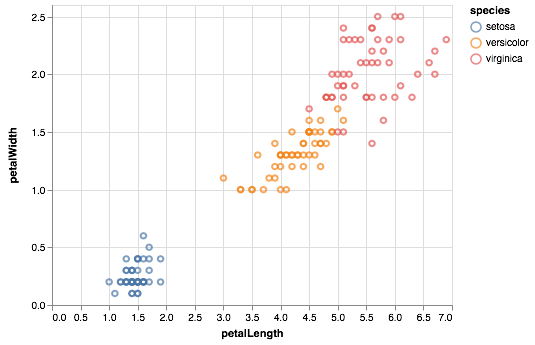

In [36]:


iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)